In [18]:
import pandas as pd
#read data
data=pd.read_csv("training.csv",sep=";",decimal=',')
val=pd.read_csv("validation.csv",sep=";",decimal=',')
#data overview
data.head(10)

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,17.92,0.000054,u,g,c,v,1.750,f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,16.92,0.000034,y,p,k,v,0.290,f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,31.25,0.000112,u,g,ff,ff,0.000,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,48.17,0.000133,u,g,i,o,0.335,f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,32.33,0.000350,u,g,k,v,0.500,f,f,0,t,g,232.0,0,2320000.0,f,0,no.
5,a,34.83,0.000125,y,p,i,h,0.500,f,f,0,t,g,160.0,0,1600000.0,f,0,no.
6,a,26.17,0.000200,u,g,j,j,0.000,f,f,0,t,g,276.0,1,2760000.0,NaN,0,no.
7,b,21.17,0.000087,y,p,c,h,0.250,f,f,0,f,g,280.0,204,2800000.0,NaN,0,no.
8,b,28.92,0.000037,u,g,c,v,0.290,f,f,0,f,g,220.0,140,2200000.0,NaN,0,no.
9,b,18.17,0.001025,u,g,c,h,1.085,f,f,0,f,g,320.0,13,3200000.0,NaN,0,no.


In [19]:
#see the data types and number of categories in each column
for i in data.columns:
        print(i+" "+str(len(data.groupby([i]).size()))+" "+str(data[i].dtype))

variable1 2 object
variable2 288 float64
variable3 179 float64
variable4 3 object
variable5 3 object
variable6 14 object
variable7 9 object
variable8 118 float64
variable9 2 object
variable10 2 object
variable11 23 int64
variable12 2 object
variable13 3 object
variable14 136 float64
variable15 182 int64
variable17 136 float64
variable18 2 object
variable19 2 int64
classLabel 2 object


In [21]:
#all objects and variable 19 are categorical data
for i in data.columns:
    if data[i].dtype=='O' or i=='variable19':
        data[i] = data[i].astype('category')
        val[i]=val[i].astype('category')


In [4]:
#Calculate the percentage of rows that are valid (not NA) in each column
print((data.count()/data.shape[0])*100)

variable1      98.945946
variable2      98.945946
variable3     100.000000
variable4      98.270270
variable5      98.270270
variable6      98.216216
variable7      98.216216
variable8     100.000000
variable9     100.000000
variable10    100.000000
variable11    100.000000
variable12    100.000000
variable13    100.000000
variable14     97.297297
variable15    100.000000
variable17     97.297297
variable18     42.027027
variable19    100.000000
classLabel    100.000000
dtype: float64


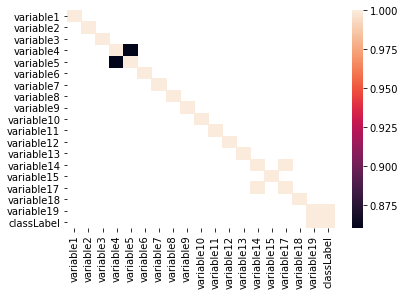

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
df=data.copy()
for i in df.columns:
    if str(df[i].dtype) =='category':
        df[i] = df[i].astype('category').cat.codes
sns.heatmap(df.corr()[df.corr()>0.85])
#The graph shows a perfect correlation between 
#1-variable 17 and 14
#2-variable 19 and target variable

In [6]:
#if variable 19 has a high correlation with the target also in the validation set then we can use only variable 19
#for direct prediction of target 
df=val.copy()
for i in df.columns:
    if str(df[i].dtype) =='category':
        df[i] = df[i].astype('category').cat.codes

df[df.columns[-2]].corr(df[df.columns[-1]])

-0.010024590406736408

In [7]:
#remove variable 18 as it has a high percentage of NA 
data=data.drop(columns="variable18")
val=val.drop(columns="variable18")
#remove column 17 as it has a large scale and perfectly correlates with variable 14
data=data.drop(columns="variable17")
val=val.drop(columns="variable17")
#Remove variable 19 as it will mess up the model
data=data.drop(columns="variable19")
val=val.drop(columns="variable19")


In [8]:
#check for data mismatch
print(data.groupby(['classLabel']).size())
print(val.groupby(['classLabel']).size())

classLabel
no.      276
yes.    3424
dtype: int64
classLabel
no.     107
yes.     93
dtype: int64


In [9]:
#remove duplicate data from training set
data=data.drop_duplicates()

In [10]:
#check for data mismatch
print(data.groupby(['classLabel']).size())
print(val.groupby(['classLabel']).size())
#This shows that dat was duplicated for the yes class about 16 times

classLabel
no.     276
yes.    214
dtype: int64
classLabel
no.     107
yes.     93
dtype: int64


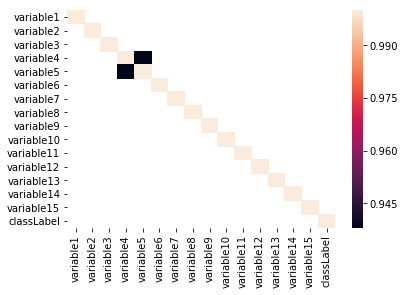

In [11]:
df=data.copy()
for i in df.columns:
    if str(df[i].dtype) =='category':
        df[i] = df[i].astype('category').cat.codes
sns.heatmap(df.corr()[df.corr()>0.9])

In [12]:
#Remove variable 4 as it is highly correlated with variable 5
data=data.drop(columns="variable4")
val=val.drop(columns="variable4")

In [13]:
#check the percentage of outliers in columns
for i in data.columns:
    if str(data[i].dtype) !='category':
            upper_lim = data[i].quantile(.95)
            lower_lim = data[i].quantile(.05)
            print(i)
            print(len(data[(data[i] < upper_lim) & (data[i] > lower_lim)])/len(data[i]))

variable2
0.8795918367346939
variable3
0.8938775510204081
variable8
0.826530612244898
variable11
0.336734693877551
variable14
0.726530612244898
variable15
0.5265306122448979


In [14]:
#Remove variable 11 as it has a large percentage of outliers
data=data.drop(columns="variable11")
val=val.drop(columns="variable11")

In [15]:
data.to_csv("training_cleaned_na.csv",index=False)
val.to_csv("val_cleaned_na.csv",index=False)

In [16]:
print((data.count()/data.shape[0])*100)

variable1      98.163265
variable2      98.163265
variable3     100.000000
variable5      99.183673
variable6      98.775510
variable7      98.775510
variable8     100.000000
variable9     100.000000
variable10    100.000000
variable12    100.000000
variable13    100.000000
variable14     97.959184
variable15    100.000000
classLabel    100.000000
dtype: float64


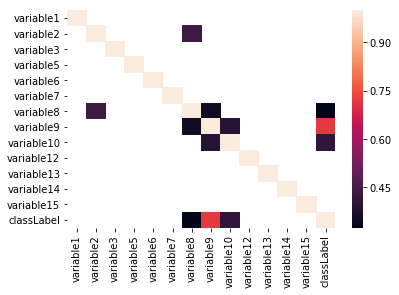

In [17]:
df=data.copy()
for i in df.columns:
    if str(df[i].dtype) =='category':
        df[i] = df[i].astype('category').cat.codes
sns.heatmap(df.corr()[df.corr()>0.3])